In [249]:
import torch
print(torch.__version__)

1.0.0


In [250]:
import torchvision
print(torchvision.__version__)

0.2.1


In [251]:
if torch.cuda.is_available():
    devID=torch.cuda.current_device()
    devID, torch.cuda.get_device_name(devID)
else:
    print("Torch Cuda not avaialbe")

Torch Cuda not avaialbe


In [252]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')
device

device(type='cpu')

In [253]:
import sklearn
print(sklearn.__version__)

0.20.1


In [254]:
import pandas as pd 
import numpy as np 
import json

In [255]:
PATH ='data/'
!ls data

data_description.txt  sample_submission.csv  test.csv  train.csv


In [256]:
train = pd.read_csv(PATH+'train.csv')
TEST = pd.read_csv(PATH+'test.csv')

In [257]:
train.shape

(1460, 81)

In [258]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [259]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [260]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [261]:
# set target columns and remove from training dataset
house_target = train.SalePrice
house_target_desc = 'SalePrice'

#house_predictors = train.copy()
trainT = train.drop([house_target_desc], axis=1)

train_len = len(trainT)
house_predictors = pd.concat([trainT, TEST], ignore_index=True)
house_predictors.shape


(2919, 80)

In [262]:
#check if target has any missing values
house_target.isnull().values.any()

False

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


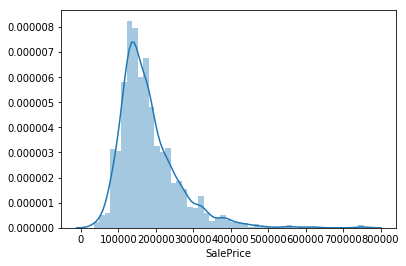

In [263]:
import seaborn as sns
%matplotlib inline
sns.distplot(house_target)

In [264]:
house_predictors.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Handling Missing Values

In [265]:
# check for any NaN values in dataset
house_predictors.isnull().values.any()

True

In [266]:
#assemble list of columns with missing values count > 0 (NaN)
missing_val_count_by_column = (house_predictors.isnull().sum())
missing_val_count_by_column=missing_val_count_by_column[missing_val_count_by_column > 0]
print(missing_val_count_by_column, "out of total dataset length:", len(house_predictors))

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64 out of total dataset length: 2919


In [267]:
# find columns with missing values and count how many
missing_val_count_by_column = (house_predictors.isnull().sum())
missing_val_count_by_column=missing_val_count_by_column[missing_val_count_by_column > 0]
missing_val_count_by_column = pd.DataFrame(missing_val_count_by_column)
#missing_val_count_by_column = missing_val_count_by_column.rename(columns={'0': 'Missing'}, inplace=True)
missing_val_count_by_column['Percentage'] = missing_val_count_by_column[0]/len(house_predictors)*100
missing_val_count_by_column.columns=['Missing Values', 'Percentage']
missing_val_count_by_column

,Missing Values,Percentage
MSZoning,4,0.137033
LotFrontage,486,16.649538
Alley,2721,93.216855
Utilities,2,0.068517
Exterior1st,1,0.034258
Exterior2nd,1,0.034258
MasVnrType,24,0.822199
MasVnrArea,23,0.787941
BsmtQual,81,2.774923
BsmtCond,82,2.809181


In [268]:
missing_val_count_by_column.T.columns
house_predictors[missing_val_count_by_column.T.columns].head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
1,RL,80.0,NaN,AllPub,MetalSd,MetalSd,None,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
2,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
3,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,None,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
4,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


In [269]:
#Removing features with too many missing values, with % thresold
remove_columns = missing_val_count_by_column[missing_val_count_by_column.Percentage > 50.0]
remove_columns.T


,Alley,PoolQC,Fence,MiscFeature
Missing Values,2721.000000,2909.000000,2348.000000,2814.000000
Percentage,93.216855,99.657417,80.438506,96.402878


In [270]:
for cols in remove_columns.T.columns:
    #print(cols)
    house_predictors_shrunk = house_predictors.drop([cols], axis=1)
house_predictors_shrunk.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,0,12,2008,WD,Normal


### Identifying Categorical and Conditional variables

In [271]:
#Removing as they break fit loop: 'OverallQual','BsmtCond', 'Electrical','SaleType'

cat_vars = ['Id', 'MSSubClass', 'MSZoning', 'Street', 'LotShape','LandContour','Utilities','LotConfig',
           'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallCond',
            'YearBuilt', 'YearRemodAdd', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
             'ExterCond','Foundation','BsmtQual','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating',
             'HeatingQC','CentralAir', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
             'BedroomAbvGr','KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd','Functional', 'Fireplaces',
             'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars','GarageQual','GarageCond','PavedDrive',
             'MoSold', 'YrSold','SaleCondition','OverallQual','BsmtCond','SaleType']

#reducing number of categorical and cont for quick analysis
#cat_vars = ['Id', 'MSSubClass', 'MSZoning', 'Street', 'LotShape','LandContour','Utilities','LotConfig','BsmtQual']

contin_vars = ['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
              '1stFlrSF','2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
              'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal']

#contin_vars = ['LotFrontage','LotArea', 'MasVnrArea']

house_target_desc = 'SalePrice'

In [272]:
house_predictors_shrunk[cat_vars].head(40).T
# item 39 of BsmQual is Nan

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Id,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,70,20,20,20,120,60,20,20,20,90
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,C (all),RL,RL,RL,RL,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,...,Reg,IR1,Reg,IR1,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Corner,Inside,Corner,...,Inside,CulDSac,Corner,Inside,Inside,Inside,Corner,Inside,Inside,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,...,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,...,IDOTRR,Sawyer,CollgCr,NAmes,NridgHt,NridgHt,CollgCr,NAmes,NAmes,Edwards


In [273]:
house_predictors_shrunk[contin_vars].head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,70.0,85.0,NaN,91.0,NaN,51.0,NaN,72.0,66.0,70.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0,14115.0,10084.0,10382.0,6120.0,7420.0,11200.0,11924.0,12968.0,10652.0,10920.0,6120.0,11241.0,10791.0,13695.0,7560.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0,0.0,186.0,240.0,0.0,0.0,0.0,286.0,0.0,306.0,212.0,0.0,180.0,0.0,0.0,0.0
BsmtFinSF1,706.0,978.0,486.0,216.0,655.0,732.0,1369.0,859.0,0.0,851.0,906.0,998.0,737.0,0.0,733.0,0.0,578.0,0.0,646.0,504.0
BsmtFinSF2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BsmtUnfSF,150.0,284.0,434.0,540.0,490.0,64.0,317.0,216.0,952.0,140.0,134.0,177.0,175.0,1494.0,520.0,832.0,426.0,0.0,468.0,525.0
TotalBsmtSF,856.0,1262.0,920.0,756.0,1145.0,796.0,1686.0,1107.0,952.0,991.0,1040.0,1175.0,912.0,1494.0,1253.0,832.0,1004.0,0.0,1114.0,1029.0
1stFlrSF,856.0,1262.0,920.0,961.0,1145.0,796.0,1694.0,1107.0,1022.0,1077.0,1040.0,1182.0,912.0,1494.0,1253.0,854.0,1004.0,1296.0,1114.0,1339.0
2ndFlrSF,854.0,0.0,866.0,756.0,1053.0,566.0,0.0,983.0,752.0,0.0,0.0,1142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LowQualFinSF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [274]:
### fill in missing values

In [275]:
# are there any missing values in our categorical columns
house_predictors_shrunk[cat_vars].isnull().values.any()

True

In [276]:
# are there any missing values in our continous columns
house_predictors_shrunk[contin_vars].isnull().values.any()

True

In [277]:
# fill in unknown NaN values for selected cont columns with MEAN
for column in contin_vars:
    #house_predictors[column] = house_predictors[column].fillna(0).astype('float32')
     house_predictors_shrunk[column] = house_predictors_shrunk[column].fillna(house_predictors_shrunk[column].mean()).astype('float32')

#test to make sure
house_predictors_shrunk[column].isnull().values.any()

False

In [278]:
house_predictors_shrunk[contin_vars].head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,69.305794,51.0,50.0,70.0,85.0,69.305794,91.0,69.305794,51.0,69.305794,72.0,66.0,70.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0,14115.0,10084.0,10382.000000,6120.0,7420.0,11200.0,11924.0,12968.000000,10652.0,10920.000000,6120.0,11241.000000,10791.0,13695.0,7560.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0,0.0,186.0,240.000000,0.0,0.0,0.0,286.0,0.000000,306.0,212.000000,0.0,180.000000,0.0,0.0,0.0
BsmtFinSF1,706.0,978.0,486.0,216.0,655.0,732.0,1369.0,859.000000,0.0,851.0,906.0,998.0,737.000000,0.0,733.000000,0.0,578.000000,0.0,646.0,504.0
BsmtFinSF2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
BsmtUnfSF,150.0,284.0,434.0,540.0,490.0,64.0,317.0,216.000000,952.0,140.0,134.0,177.0,175.000000,1494.0,520.000000,832.0,426.000000,0.0,468.0,525.0
TotalBsmtSF,856.0,1262.0,920.0,756.0,1145.0,796.0,1686.0,1107.000000,952.0,991.0,1040.0,1175.0,912.000000,1494.0,1253.000000,832.0,1004.000000,0.0,1114.0,1029.0
1stFlrSF,856.0,1262.0,920.0,961.0,1145.0,796.0,1694.0,1107.000000,1022.0,1077.0,1040.0,1182.0,912.000000,1494.0,1253.000000,854.0,1004.000000,1296.0,1114.0,1339.0
2ndFlrSF,854.0,0.0,866.0,756.0,1053.0,566.0,0.0,983.000000,752.0,0.0,0.0,1142.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
LowQualFinSF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [279]:
# fill in unknown NaN values for selected cont columns with "missing"
for column in cat_vars:
    #house_predictors[column] = house_predictors[column].fillna(0).astype('float32')
     house_predictors_shrunk[column] = house_predictors_shrunk[column].fillna('missing').astype('object')

#test to make sure
house_predictors_shrunk[column].isnull().values.any()

False

In [280]:
house_predictors_shrunk[cat_vars].head(40).T
# item 39 of BsmQual NaN is changed to 'missing'

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Id,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,70,20,20,20,120,60,20,20,20,90
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,C (all),RL,RL,RL,RL,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,...,Reg,IR1,Reg,IR1,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Corner,Inside,Corner,...,Inside,CulDSac,Corner,Inside,Inside,Inside,Corner,Inside,Inside,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,...,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,...,IDOTRR,Sawyer,CollgCr,NAmes,NridgHt,NridgHt,CollgCr,NAmes,NAmes,Edwards


In [281]:
house_predictors_shrunk.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,0.0,NaN,NaN,0.0,2,2008,WD,Normal
1,2,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,0.0,NaN,NaN,0.0,5,2007,WD,Normal
2,3,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,0.0,NaN,NaN,0.0,9,2008,WD,Normal
3,4,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,0.0,NaN,NaN,0.0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,0.0,NaN,NaN,0.0,12,2008,WD,Normal


In [282]:
# Assemble dataset with only selected cont and cat columns
#house_predictors_sml = house_predictors_shrunk[cat_vars+contin_vars+[house_target_desc]].copy()
house_predictors_sml = house_predictors_shrunk[cat_vars+contin_vars].copy()
house_predictors_sml.head()

,Id,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,1,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0.0,1710.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0
1,2,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0.0,1262.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0.0,1786.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0
3,4,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0.0,1717.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0
4,5,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0.0,2198.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0


In [283]:
pd.DataFrame(house_target).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
SalePrice    1460 non-null int64
dtypes: int64(1)
memory usage: 11.5 KB


In [284]:
meanT = house_target.mean(axis=0)
stdT = house_target.std(axis=0)
meanT, stdT

(180921.19589041095, 79442.50288288663)

In [285]:
#partition the Preprocessed Dataset Back into Train and Test Groups
# this will be used for model training and validation
train_processed = pd.concat([house_predictors_sml[:train_len]], axis=1)

# this will be used to generate the final submission
test_processed = house_predictors_sml[train_len:]

# confirm that the data looks correct
print(train_processed.shape)
print(test_processed.shape)
print(house_target.shape)

(1460, 74)
(1459, 74)
(1460,)


In [286]:
## Spliting dataset
from sklearn.model_selection import train_test_split

# split train dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(train_processed, house_target,
                                                    train_size=0.7, random_state=42)
X_train.shape, y_train.shape

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((1021, 74), (1021,))

In [287]:
type(y_train)

pandas.core.series.Series

In [288]:
y_train.head()

1452    145000
762     215200
932     320000
435     212000
629     168500
Name: SalePrice, dtype: int64

In [289]:
#assign correct data types 
for v in cat_vars:
    X_train[v] = X_train[v].astype('category').cat.as_ordered()
    X_test[v] = X_test[v].astype('category').cat.as_ordered()
    test_processed[v] = test_processed[v].astype('category').cat.as_ordered()
    

# for v in cat_vars:
#     X_train[v] = X_train[v].astype(str)  
#     X_test[v] = X_test[v].astype(str)  
    
for v in contin_vars:
    X_train[v] = X_train[v].astype('float32') 
    X_test[v] = X_test[v].astype('float32') 
    test_processed[v] = test_processed[v].astype('float32') 
    
house_target = house_target.astype('float32')  
y_train = y_train.astype('float32') 
y_test = y_test.astype('float32') 

#X_train[house_target_desc] = X_train[house_target_desc].astype('float32') 
    
house_predictors_sml.info()

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 74 columns):
Id               2919 non-null object
MSSubClass       2919 non-null object
MSZoning         2919 non-null object
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallCond      2919 non-null object
YearBuilt        2919 non-null object
YearRemodAdd     2919 non-null object
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919 non-null object
ExterQual        2919 non-null object
ExterCond        29

## Scaling

In [290]:
# Scale train data.
mean = X_train[contin_vars].mean(axis=0)
std = X_train[contin_vars].std(axis=0)
X_train[contin_vars] = ( X_train[contin_vars] - mean ) / std
X_train[contin_vars].head()

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
1452,-1.525753,-0.623784,-0.145399,0.218240,-0.280346,-1.280216,-1.145118,-0.249700,-0.802547,-0.120314,-0.860475,0.229844,-0.740369,-0.311661,-0.346391,-0.119317,-0.275907,-0.069193,-0.122989
762,0.079549,-0.185772,-0.609321,-0.918758,-0.280346,0.362394,-0.678160,-1.040639,0.972151,-0.120314,0.033710,0.656623,0.542299,-0.066076,-0.346391,-0.119317,-0.275907,-0.069193,-0.122989
932,0.600188,0.081535,1.141983,-0.970934,-0.280346,2.994609,1.888995,1.889428,-0.802547,-0.120314,0.707642,1.490999,-0.740369,2.043068,-0.346391,-0.119317,-0.275907,-0.069193,-0.122989
435,-1.178661,-0.006950,-0.609321,-0.133946,1.993603,-1.123135,-0.582087,-0.878856,1.087745,-0.120314,0.248314,0.349726,0.458812,0.165063,-0.346391,-0.119317,-0.275907,-0.069193,-0.122989
629,0.513414,-0.152248,0.892625,0.385638,1.940720,-0.633943,0.421092,0.464198,-0.802547,-0.120314,-0.337141,0.205868,0.595428,-0.716155,-0.346391,-0.119317,-0.275907,-0.069193,-0.122989


In [291]:
# Scale test data.
mean = X_test[contin_vars].mean(axis=0)
std = X_test[contin_vars].std(axis=0)
X_test[contin_vars] = ( X_test[contin_vars] - mean ) / std
X_test[contin_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
892,0.033943,-0.276607,-0.506318,0.505789,-0.308026,-0.377597,0.015446,-0.208602,-0.776728,-0.119894,-0.813478,-0.884432,0.969882,-0.684187,-0.389519,-0.116328,-0.256021,-0.067457,-0.064349
1105,1.473327,0.400135,1.318697,1.330607,-0.308026,-0.296838,0.982417,0.928434,1.860179,-0.119894,2.227045,1.101945,0.914691,-0.135243,-0.389519,-0.116328,-0.256021,-0.067457,-0.064349
413,-0.685749,-0.180433,-0.506318,-0.976201,-0.308026,1.034524,-0.106622,-0.313883,-0.776728,-0.119894,-0.891741,-0.458780,-0.796221,-0.684187,1.772707,-0.116328,-0.256021,-0.067457,-0.064349
522,-0.994188,-0.877960,-0.506318,-0.084324,-0.308026,0.104647,-0.116196,-0.377051,0.774394,-0.119894,0.352643,-0.192747,-0.796221,-0.272479,0.209251,-0.116328,-0.256021,-0.067457,-0.064349
1036,1.010668,0.513218,-0.153415,1.308254,-0.308026,0.088495,1.358196,1.244278,-0.776728,-0.119894,0.266554,1.988720,1.301026,-0.684187,-0.389519,-0.116328,-0.256021,-0.067457,-0.064349


In [292]:
# Scale final test processed data.
mean = test_processed[contin_vars].mean(axis=0)
std = test_processed[contin_vars].std(axis=0)
test_processed[contin_vars] = ( test_processed[contin_vars] - mean ) / std
test_processed[contin_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
1460,0.549867,0.363804,-0.570000,0.063270,0.517185,-0.650406,-0.370690,-0.654337,-0.774987,-0.080456,-1.215171,1.185538,0.366551,-0.701390,-0.360617,-0.088796,1.818332,-0.057207,-0.092212
1461,0.598498,0.897553,0.041172,1.063026,-0.297790,-0.339272,0.638917,0.433149,-0.774987,-0.080456,-0.323429,-0.740959,2.347052,-0.178765,-0.360617,-0.088796,-0.301439,-0.057207,19.723757
1462,0.258080,0.809368,-0.570000,0.772987,-0.297790,-0.954677,-0.266793,-0.573968,0.891637,-0.080456,0.294407,0.042545,0.930172,-0.207800,-0.360617,-0.088796,-0.301439,-0.057207,-0.092212
1463,0.452605,0.032053,-0.456820,0.357703,-0.297790,-0.526868,-0.271311,-0.578991,0.836955,-0.080456,0.242921,-0.012762,2.088726,-0.178765,-0.360617,-0.088796,-0.301439,-0.057207,-0.092212
1464,-1.249489,-0.971475,-0.570000,-0.387170,-0.297790,1.058544,0.528244,0.310085,-0.774987,-0.080456,-0.424342,0.153157,-0.729378,0.489032,-0.360617,-0.088796,2.242286,-0.057207,-0.092212


In [293]:
#scale train and test target
mean = y_train.mean(axis=0)
std = y_train.std(axis=0)
y_train = ( y_train - mean ) / std

mean = y_test.mean(axis=0)
std = y_test.std(axis=0)
y_test = ( y_test - mean ) / std

In [294]:
#Convert cat variables to one-hot-encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for cat_col in cat_vars:
    label_encoders[cat_col] = LabelEncoder()
    X_train[cat_col] = label_encoders[cat_col].fit_transform(X_train[cat_col].astype(str))
    X_test[cat_col] = label_encoders[cat_col].fit_transform(X_test[cat_col].astype(str))
    test_processed[cat_col] = label_encoders[cat_col].fit_transform(test_processed[cat_col].astype(str))
#    X_train[cat_col] = label_encoders[cat_col].fit_transform(X_train[cat_col])
#    X_test[cat_col] = label_encoders[cat_col].fit_transform(X_test[cat_col])

/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/norvilr/anaconda3/envs/torch10/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [295]:
type(X_train), type(test_processed), type(X_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [296]:
from torch.utils.data import Dataset, DataLoader
class TabularDataset(Dataset):
  def __init__(self, data,target_data, cat_cols=None):
    self.n = data.shape[0]

    self.y =  target_data.astype(np.float32).values

    self.cat_cols = cat_cols if cat_cols else []
    self.cont_cols = [col for col in data.columns
                          if col not in self.cat_cols]

    if self.cont_cols:
      self.cont_X = data[self.cont_cols].astype(np.float32).values
    else:
      self.cont_X = np.zeros((self.n, 1))

    if self.cat_cols:
      self.cat_X = data[cat_cols].astype(np.int64).values
    else:
      self.cat_X =  np.zeros((self.n, 1))

  def __len__(self):
    """
    Denotes the total number of samples.
    """
    return self.n

  def __getitem__(self, idx):
    """
    Generates one sample of data.
    """
    return [self.y[idx], self.cont_X[idx], self.cat_X[idx]]

In [297]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FeedForwardNN(nn.Module):

  def __init__(self, emb_dims, no_of_cont, lin_layer_sizes,
               output_size, emb_dropout, lin_layer_dropouts):
    super().__init__()

    # Embedding layers
    self.emb_layers = nn.ModuleList([nn.Embedding(x, y) for x, y in emb_dims])

    no_of_embs = sum([y for x, y in emb_dims])
    self.no_of_embs = no_of_embs
    self.no_of_cont = no_of_cont

    # Linear Layers
    first_lin_layer = nn.Linear(self.no_of_embs + self.no_of_cont,
                                lin_layer_sizes[0])

    self.lin_layers =\
     nn.ModuleList([first_lin_layer] +\
          [nn.Linear(lin_layer_sizes[i], lin_layer_sizes[i + 1])
           for i in range(len(lin_layer_sizes) - 1)])
    
    for lin_layer in self.lin_layers:
      nn.init.kaiming_normal_(lin_layer.weight.data)

    # Output Layer
    self.output_layer = nn.Linear(lin_layer_sizes[-1],
                                  output_size)
    nn.init.kaiming_normal_(self.output_layer.weight.data)

    # Batch Norm Layers
    self.first_bn_layer = nn.BatchNorm1d(self.no_of_cont)
    self.bn_layers = nn.ModuleList([nn.BatchNorm1d(size)
                                    for size in lin_layer_sizes])

    # Dropout Layers
    self.emb_dropout_layer = nn.Dropout(emb_dropout)
    self.droput_layers = nn.ModuleList([nn.Dropout(size)
                                  for size in lin_layer_dropouts])

  def forward(self, cont_data, cat_data):

    if self.no_of_embs != 0:
      x = [emb_layer(cat_data[:, i])
           for i,emb_layer in enumerate(self.emb_layers)]
      x = torch.cat(x, 1)
      x = self.emb_dropout_layer(x)

    if self.no_of_cont != 0:
      normalized_cont_data = self.first_bn_layer(cont_data)

      if self.no_of_embs != 0:
        x = torch.cat([x, normalized_cont_data], 1) 
      else:
        x = normalized_cont_data

    for lin_layer, dropout_layer, bn_layer in\
        zip(self.lin_layers, self.droput_layers, self.bn_layers):
      
      x = F.relu(lin_layer(x))
      x = bn_layer(x)
      x = dropout_layer(x)

    x = self.output_layer(x)

    return x

In [298]:
#count unique values in test and train caterical
cat_dims_train=[int(X_train[col].nunique()) for col in cat_vars]
#cat_dims_test = [int(X_test[col].nunique()) for col in cat_vars]

cat_dims_trainFull = [[int(X_train[col].nunique()),col] for col in cat_vars]
cat_dims_trainFull

[[1021, 'Id'],
 [15, 'MSSubClass'],
 [5, 'MSZoning'],
 [2, 'Street'],
 [4, 'LotShape'],
 [4, 'LandContour'],
 [2, 'Utilities'],
 [5, 'LotConfig'],
 [3, 'LandSlope'],
 [25, 'Neighborhood'],
 [9, 'Condition1'],
 [6, 'Condition2'],
 [5, 'BldgType'],
 [8, 'HouseStyle'],
 [9, 'OverallCond'],
 [107, 'YearBuilt'],
 [61, 'YearRemodAdd'],
 [6, 'RoofStyle'],
 [7, 'RoofMatl'],
 [14, 'Exterior1st'],
 [16, 'Exterior2nd'],
 [5, 'MasVnrType'],
 [4, 'ExterQual'],
 [5, 'ExterCond'],
 [6, 'Foundation'],
 [5, 'BsmtQual'],
 [5, 'BsmtExposure'],
 [7, 'BsmtFinType1'],
 [7, 'BsmtFinType2'],
 [6, 'Heating'],
 [5, 'HeatingQC'],
 [2, 'CentralAir'],
 [4, 'BsmtFullBath'],
 [3, 'BsmtHalfBath'],
 [4, 'FullBath'],
 [3, 'HalfBath'],
 [8, 'BedroomAbvGr'],
 [3, 'KitchenAbvGr'],
 [4, 'KitchenQual'],
 [12, 'TotRmsAbvGrd'],
 [7, 'Functional'],
 [4, 'Fireplaces'],
 [7, 'GarageType'],
 [95, 'GarageYrBlt'],
 [4, 'GarageFinish'],
 [5, 'GarageCars'],
 [6, 'GarageQual'],
 [6, 'GarageCond'],
 [3, 'PavedDrive'],
 [12, 'MoSold'],


In [299]:
# calculate embedding dimmenstions
emb_dims = [(x, min(50, (x + 8) // 2)) for x in cat_dims_train]

In [300]:
# instantiating TabularDataset class

# Pytorch abstract class representing a Dataset.
#All other datasets should subclass it. All subclasses should override
#``__len__``, that provides the size of the dataset, and ``__getitem__``,

train_dataset = TabularDataset(data=X_train, target_data=y_train, cat_cols=cat_vars)
test_dataset = TabularDataset(data=X_test, target_data=y_test, cat_cols=cat_vars)

In [301]:
batchsize = 64
train_dataloader = DataLoader(train_dataset, batchsize, shuffle=True, num_workers=4)
test_dataloader = DataLoader(test_dataset, batchsize, shuffle=True, num_workers=4)

In [302]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [303]:
model = FeedForwardNN(emb_dims, no_of_cont=len(train_dataset.cont_cols), 
                      lin_layer_sizes=[200, 500],
                      output_size=1, emb_dropout=0.04,
                      lin_layer_dropouts=[0.001,0.01])
model = model.to(device)
model

FeedForwardNN(
  (emb_layers): ModuleList(
    (0): Embedding(1021, 50)
    (1): Embedding(15, 11)
    (2): Embedding(5, 6)
    (3): Embedding(2, 5)
    (4): Embedding(4, 6)
    (5): Embedding(4, 6)
    (6): Embedding(2, 5)
    (7): Embedding(5, 6)
    (8): Embedding(3, 5)
    (9): Embedding(25, 16)
    (10): Embedding(9, 8)
    (11): Embedding(6, 7)
    (12): Embedding(5, 6)
    (13): Embedding(8, 8)
    (14): Embedding(9, 8)
    (15): Embedding(107, 50)
    (16): Embedding(61, 34)
    (17): Embedding(6, 7)
    (18): Embedding(7, 7)
    (19): Embedding(14, 11)
    (20): Embedding(16, 12)
    (21): Embedding(5, 6)
    (22): Embedding(4, 6)
    (23): Embedding(5, 6)
    (24): Embedding(6, 7)
    (25): Embedding(5, 6)
    (26): Embedding(5, 6)
    (27): Embedding(7, 7)
    (28): Embedding(7, 7)
    (29): Embedding(6, 7)
    (30): Embedding(5, 6)
    (31): Embedding(2, 5)
    (32): Embedding(4, 6)
    (33): Embedding(3, 5)
    (34): Embedding(4, 6)
    (35): Embedding(3, 5)
    (36): Embe

In [304]:
from collections import defaultdict
vloss = defaultdict(list)
tloss = defaultdict(list)

In [305]:
no_of_epochs = 100
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [306]:
from sklearn.metrics import mean_squared_error

def inv_y(y): return np.exp(y)

def rmse(targ, y_pred):
    return np.sqrt(mean_squared_error(inv_y(y_pred), inv_y(targ))) #.detach().numpy()

In [307]:
import os
import time
import copy

since = time.time()

best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0
best_tst_loss = 1e20
train_losses, test_losses = [],[]
train_rmse, test_rmse = [],[]

for epoch in range(no_of_epochs):
    running_loss = 0.0
    running_train_corrects = 0.0
    
    y_true_train = list()
    y_pred_train = list()
    total_loss_train = 0   
    
    # TRAINING PHASE
    i=0
    #print('Epoch {}/{}'.format(epoch, no_of_epochs - 1))
    model.train()  # Set model to training mode
    pid = os.getpid()
    for y, cont_x, cat_x in train_dataloader:
        i += 1
        cat_x = cat_x.to(device)
        cont_x = cont_x.to(device)
        y  = y.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # Forward Pass
        preds = model(cont_x, cat_x)
        loss = criterion(preds, y)
        tloss[i].append(loss.item())
        #loss2 = torch.sqrt(criterion(torch.log(preds), torch.log(y)))
        #print(loss.item(), loss2.item())
        
        # Backward Pass and Optimization
        loss.backward()
        optimizer.step()
        
        # statistics
        running_loss += loss.item() * cat_x.size(0)  #multiple by batch size
        #running_loss += loss.item()  
        
        y_true_train += list(y.data.numpy())
        y_pred_train += list(preds.data.numpy())
        total_loss_train += loss.item()
        
        #running_train_corrects += torch.sum(preds == y.data).float()
        #print(running_loss)
        
        # print statistics
        #if i % 1000:    # print every n mini-batches         
         #   print('{}\tTrain Epoch: {} [{}/{} ({:.0f}%)] Loss: {:.4f}'.format(
        #        pid, epoch, i * len(cat_x), len(dataloader.dataset),
        #        100. * i / len(dataloader), loss.item()))
    
    train_acc = rmse(y_true_train, y_pred_train)
    train_loss = total_loss_train/len(train_dataset)
    # TESTING PHASE
    model.eval()   # Set model to evaluate mode
    y_true_val = list()
    y_pred_val = list()
    total_loss_val = 0
    running_corrects = 0
    test_loss = 0
    test_loss2 = 0
    correct = 0
    i = 0
    for y, cont_x, cat_x in test_dataloader:
        #print("1",cont_x.shape, cat_x.shape, type(cont_x), type(cat_x))
        i += 1
        cat_x = cat_x.to(device)
        cont_x = cont_x.to(device)
        y  = y.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        #print("2",cont_x.shape, cat_x.shape, type(cont_x), type(cat_x))
        
        #with torch.set_grad_enabled(False):
        with torch.no_grad():
            preds = model(cont_x, cat_x)
            loss = criterion(preds, y)
            #test_loss = torch.sqrt(criterion(torch.log(preds), torch.log(y)))
            #test_loss += torch.sqrt(criterion(torch.log(preds), torch.log(y)))
            #print(test_loss)
            #print(preds[0],y[0])
        
        #test_loss2 += F.nll_loss(preds, y, reduction='sum').item() # sum up batch loss
        #test_loss2  = 0
        #prd = preds.max(1)[1] # get the index of the max log-probability
        #correct += prd.eq(y).sum().item()
        y_true_val += list(y.data.numpy())
        y_pred_val += list(preds.data.numpy())
        total_loss_val += loss.item()
        vloss[i].append(loss.item())
                
        #running_corrects += torch.sum(preds == y.data).float()
        #running_corrects+=accuracy_score(y, preds)*100
        test_loss += loss.item() * cat_x.size(0)   #cat_x.zize(0) - batch size of 64=   
        #print("batch:",cat_x.size(0))
    
    epoch_train_loss = running_loss / len(train_dataset)
    #epoch_train_loss = running_loss / cat_x.size(0)
    #epoch_train_acc = running_train_corrects / len(train_dataset)
    
    #epoch_acc = running_corrects.double() / len(test_dataset)
    epoch_test_loss = test_loss / len(test_dataset)
    #epoch_test_loss = test_loss
    
    valacc = rmse(y_true_val, y_pred_val)
    valloss = total_loss_val/len(test_dataset)
    #print("test_loss2", test_loss2/ len(test_dataloader.dataset))
    #print( 'Accuracy: {}/{}'.format(correct, len(test_dataloader.dataset)))
    
    #epoch_loss = running_loss / dataset_sizes[phase]
    #epoch_acc = running_corrects.double() / dataset_sizes[phase]
    
    # deep copy the model
    if epoch_test_loss < best_tst_loss:
        best_tst_loss = epoch_test_loss
        best_model_wts = copy.deepcopy(model.state_dict())
        # this idea didn't work
 #   else: #always start new epoch with lowest loss
 #       model.load_state_dict(best_model_wts)
    
    train_losses.append(epoch_train_loss)
    test_losses.append(epoch_test_loss)
    train_rmse.append(train_acc)
    test_rmse.append(valacc)
    
    
#    print('Epoch {}/{}, Train Loss: {:.6f}, Train Acc:{:.6f}, Test Loss: {:.6f} Acc: {:.6f}'.
#           format(epoch, no_of_epochs - 1, epoch_train_loss, epoch_train_acc, epoch_test_loss, epoch_acc))
#     print('Epoch {}/{}, Train Loss: {:.6f}, Test Loss: {:.6f}'.
#           format(epoch, no_of_epochs - 1, epoch_train_loss, epoch_test_loss))
    print(f'Epoch {epoch}/{no_of_epochs-1}, TrainMSE: {epoch_train_loss:.4f}, TestMSE: {epoch_test_loss:.4f}, train_loss:{train_loss:.4f}, train_rmse:{train_acc:.4f}, val_loss:{valloss:.4f},val_rmse:{valacc:.4f}')
# load best model weights
model.load_state_dict(best_model_wts)
print("Best Test Loss: ", best_tst_loss)

Epoch 0/99, TrainMSE: 1.4385, TestMSE: 1.4323, train_loss:0.0225, train_rmse:46.2082, val_loss:0.0227,val_rmse:47.6088
Epoch 1/99, TrainMSE: 1.2584, TestMSE: 1.6038, train_loss:0.0197, train_rmse:46.1876, val_loss:0.0258,val_rmse:47.6257
Epoch 2/99, TrainMSE: 1.1842, TestMSE: 1.7064, train_loss:0.0186, train_rmse:46.1761, val_loss:0.0272,val_rmse:47.6336
Epoch 3/99, TrainMSE: 1.1368, TestMSE: 1.7911, train_loss:0.0178, train_rmse:46.1407, val_loss:0.0286,val_rmse:47.6461
Epoch 4/99, TrainMSE: 1.1165, TestMSE: 1.7097, train_loss:0.0175, train_rmse:46.1974, val_loss:0.0275,val_rmse:47.6425
Epoch 5/99, TrainMSE: 1.1088, TestMSE: 1.6191, train_loss:0.0174, train_rmse:46.1794, val_loss:0.0256,val_rmse:47.6402
Epoch 6/99, TrainMSE: 1.0938, TestMSE: 1.5568, train_loss:0.0171, train_rmse:46.1853, val_loss:0.0249,val_rmse:47.6367
Epoch 7/99, TrainMSE: 1.0924, TestMSE: 1.5172, train_loss:0.0172, train_rmse:46.1941, val_loss:0.0242,val_rmse:47.6330
Epoch 8/99, TrainMSE: 1.0794, TestMSE: 1.5262, t

Epoch 69/99, TrainMSE: 1.0221, TestMSE: 1.1511, train_loss:0.0160, train_rmse:46.1830, val_loss:0.0187,val_rmse:47.6283
Epoch 70/99, TrainMSE: 1.0235, TestMSE: 1.1642, train_loss:0.0161, train_rmse:46.1692, val_loss:0.0185,val_rmse:47.6309
Epoch 71/99, TrainMSE: 1.0222, TestMSE: 1.2222, train_loss:0.0160, train_rmse:46.1742, val_loss:0.0193,val_rmse:47.6375
Epoch 72/99, TrainMSE: 1.0231, TestMSE: 1.2178, train_loss:0.0160, train_rmse:46.1868, val_loss:0.0192,val_rmse:47.6361
Epoch 73/99, TrainMSE: 1.0234, TestMSE: 1.1941, train_loss:0.0160, train_rmse:46.1845, val_loss:0.0189,val_rmse:47.6330
Epoch 74/99, TrainMSE: 1.0228, TestMSE: 1.2208, train_loss:0.0160, train_rmse:46.1748, val_loss:0.0193,val_rmse:47.6364
Epoch 75/99, TrainMSE: 1.0214, TestMSE: 1.1243, train_loss:0.0160, train_rmse:46.1858, val_loss:0.0178,val_rmse:47.6245
Epoch 76/99, TrainMSE: 1.0223, TestMSE: 1.1956, train_loss:0.0160, train_rmse:46.1787, val_loss:0.0190,val_rmse:47.6327
Epoch 77/99, TrainMSE: 1.0218, TestMSE: 

In [308]:
import matplotlib.pyplot as plt
%matplotlib inline

In [309]:
# t = [np.mean(tloss[el]) for el in tloss]
# v = [np.mean(vloss[el]) for el in vloss]

# plt.plot(t,label = "Train losses")
# plt.plot(v, label = "Test losses")
# plt.legend()

# p = pd.DataFrame({'Train Loss': t, 'Validation Loss': v, 'Epochs': range(40)})


# _ = p.plot(x='Epochs', y=['Train Loss', 'Validation Loss'], 
#            title='Train and Validation Loss over Epochs')

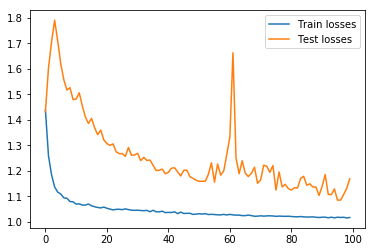

In [310]:
plt.plot(train_losses,label = "Train losses")
plt.plot(test_losses, label = "Test losses")
plt.legend()

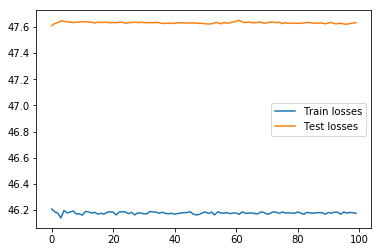

In [311]:
# plt.ylim(bottom=0.6e10,top=0.75e10)
#lt.ylim(bottom=0.997,top=1.007)
plt.plot(train_rmse,label = "Train losses")
plt.plot(test_rmse, label = "Test losses")
plt.legend()

In [312]:
test_processed.shape

(1459, 74)

In [347]:
test_processed2 = test_processed[0:32][:]
test_processed2.shape

(32, 74)

In [348]:
#Test = torch.from_numpy(Test.values).float()
#Test.head()

cont_Y = torch.from_numpy(test_processed2[contin_vars].astype(np.float32).values).to(device)
cat_Y = torch.from_numpy(test_processed2[cat_vars].astype(np.int64).values).to(device)

In [349]:
with torch.no_grad():
    model.eval()
    output = model.forward(cont_Y,cat_Y)

output.shape

torch.Size([32, 1])

In [350]:
output

tensor([[-6.5170e-01],
        [-1.3636e-01],
        [ 6.4279e-02],
        [ 6.3337e-04],
        [ 6.0372e-02],
        [ 5.3209e-02],
        [ 1.3603e-02],
        [ 1.7471e-01],
        [ 1.1334e-01],
        [-1.4204e-02],
        [-1.4436e-01],
        [ 1.8426e-01],
        [ 8.7622e-02],
        [ 1.6848e-01],
        [ 2.8808e-01],
        [ 1.2577e-01],
        [ 3.2815e-01],
        [-1.7603e-02],
        [-2.6701e-02],
        [ 1.4821e-01],
        [ 1.6976e-01],
        [ 1.7457e-01],
        [ 3.2086e-01],
        [ 1.2738e-01],
        [-1.0429e-01],
        [ 1.1168e-01],
        [ 4.8293e-02],
        [ 1.5600e-01],
        [ 2.6726e-01],
        [-1.2222e-02],
        [-1.6614e-01],
        [ 3.9739e-03]])

In [351]:
stdT,meanT

(79442.50288288663, 180921.19589041095)

In [352]:
out=output.numpy()

In [353]:
out2 = out * stdT + meanT
out2

array([[129148.14],
       [170088.44],
       [186027.67],
       [180971.52],
       [185717.27],
       [185148.28],
       [182001.86],
       [194800.58],
       [189924.88],
       [179792.78],
       [169452.52],
       [195559.6 ],
       [187882.11],
       [194305.69],
       [203807.39],
       [190912.5 ],
       [206990.27],
       [179522.81],
       [178799.98],
       [192695.4 ],
       [194407.6 ],
       [194789.44],
       [206411.06],
       [191040.23],
       [172636.33],
       [189793.19],
       [184757.69],
       [193313.9 ],
       [202152.69],
       [179950.3 ],
       [167722.95],
       [181236.9 ]], dtype=float32)

In [354]:
out2.shape

(32, 1)